# COGS 108 - Final Project 

# Names

- Jialiang Ji A14711559
- Leyi Shang A13718465
- Yabo Shi
- Kegan Wong
- Tram Nguyen

# Group Member Contribution

- Jialiang Ji: 
- Leyi Shang:
- Yabo Shi:
- Tram Nguyen:
- Kegan Wong:

# Research Question

What is the relationship between overall internet usage and socioeconomic level(house income,  education level, age, quality of life, relative urbanization) of each county in the United States. 
More specifically, do county with higher education level and household income tend to have a larger proportion of population having access to the internet?

## Background and Prior Work

Background 
Draft: The American Community Survey (ACS) is a yearly survey which collects data about the United States, covering various fields such as education and employment. Since 2013, the survey started asking questions about internet use. These statistics were organized together and published by the end of each year. In 2016, the survey reported that in Douglas County, about 5% of U.S households surveyed did not have a computer, and 10% of U.S households surveyed did not have an internet subscription.
In 2018, the Pew Research Center produced a chart to visualize internet usage in the U.S, but the details of the data were hidden and no analysis were provided. From the chart we can only infer that some characteristics of people without internet are: aged over 65, with an annual income below 30k, failed to attend highschool, or living in the rural region. Then, another report written by Camille Ryan in the same year suggested that there were some regional differences across the country. But his report mainly focused more on comparing and contrasting the sets of survey questions instead of exploring the correlation between region, race and internet use.
The prior works only give board conclusions and fail to address the details of internet usage across region and race. We aim to expand on the topic and thoroughly explore how does internet use changes across region. Furthermore, we will relate the differences to social factors such as race and poverty.

Reference: 
1.American fact finder: TYPES OF COMPUTERS AND INTERNET SUBSCRIPTIONS  https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_16_1YR_S2801&prodType=table
2.Pew Research Center: 11% of Americans don’t use the internet. Who are they?
https://www.pewresearch.org/fact-tank/2018/03/05/some-americans-dont-use-the-internet-who-are-they/
3.United States Census:Computer and Internet Use in the United States: 2016
https://www.census.gov/library/publications/2018/acs/acs-39.html



# Hypothesis



We predict that a high socioeconomic level does have a strong relationship with its county’s internet usage. In other words, if a county tend to have an average of lower educational level or a bigger population of below poverty residents compared to other counties, they will more likely have a higher tendency without internet accessibility.


# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [1]:
## YOUR CODE HERE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import json
import datetime

# Significance Test
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# NLP
import re
from nltk.corpus import stopwords

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Data Cleaning

Describe your data cleaning steps here.

In [2]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
# Load the dataset 
df = pd.read_csv("./new.csv")
df.head(n=800)

,countyState,GEOID,lon,lat,P_total,P_white,P_black,P_asian,P_native,P_hawaiian,...,UnderAge5inPovertyCountUB90%,90%ConfidenceInterval(UnderAge5inPovertyCount),UnderAge5inPovertyPercent,UnderAge5inPovertyPercentLB90%,UnderAge5inPovertyPercentUB90%,90%ConfidenceInterval(UnderAge5inPovertyPercent),MedianHouseholdIncomeinDollars,MedianHouseholdIncomeinDollarsLB90%,MedianHouseholdIncomeinDollarsUB90%,90%ConfidenceInterval(MedianHouseholdIncomeinDollars)
0,Fairbanks North Star Borough (AK),05000US02090,-146.599867,64.690832,100605,75501.0,4385.0,3875.0,7427.0,503.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"$74,241","$68,171","$80,311","$68,171 to $80,311"
1,Matanuska-Susitna Borough (AK),05000US02170,-149.407974,62.182173,104365,86314.0,1019.0,1083.0,5455.0,141.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"$72,296","$67,381","$77,211","$67,381 to $77,211"
2,Baldwin County (AL),05000US01003,-87.746067,30.659218,208563,180484.0,18821.0,914.0,1383.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"$56,607","$52,439","$60,775","$52,439 to $60,775"
3,Calhoun County (AL),05000US01015,-85.822513,33.771706,114611,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"$45,937","$43,419","$48,455","$43,419 to $48,455"
4,Cullman County (AL),05000US01043,-86.869267,34.131923,82471,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"$45,925","$41,985","$49,865","$41,985 to $49,865"
5,DeKalb County (AL),05000US01049,-85.803992,34.460929,70900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"$39,906","$36,346","$43,466","$36,346 to $43,466"
6,Elmore County (AL),05000US01051,-86.142739,32.597229,81799,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"$59,652","$55,049","$64,255","$55,049 to $64,255"
7,Etowah County (AL),05000US01055,-86.034420,34.047638,102564,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"$41,791","$38,946","$44,636","$38,946 to $44,636"
8,Houston County (AL),05000US01069,-85.296398,31.158193,104056,71838.0,27762.0,1054.0,443.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"$44,753","$42,919","$46,587","$42,919 to $46,587"
9,Jefferson County (AL),05000US01073,-86.896536,33.553444,659521,340506.0,279979.0,8366.0,1799.0,323.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"$50,731","$49,512","$51,950","$49,512 to $51,950"


In [3]:
# drop irrevalent columns
df.drop(['UnderAge5inPovertyCountLB90%','UnderAge5inPovertyCount','UnderAge5SAIPEPovertyUniverse','90%ConfidenceInterval(UnderAge5inPovertyPercent)','UnderAge5inPovertyPercentUB90%','UnderAge5inPovertyPercentLB90%','UnderAge5inPovertyPercent','UnderAge5inPovertyCountUB90%','90%ConfidenceInterval(UnderAge5inPovertyCount)'], axis=1, inplace=True)

df.head(n=800)

,countyState,GEOID,lon,lat,P_total,P_white,P_black,P_asian,P_native,P_hawaiian,...,Ages5to17inFamiliesinPovertyCountUB90%,90%ConfidenceInterval(Ages5to17inFamiliesinPovertyCount),Ages5to17inFamiliesinPovertyPercent,Ages5to17inFamiliesinPovertyPercentLB90%,Ages5to17inFamiliesinPovertyPercentUB90%,90%ConfidenceInterval(Ages5to17inFamiliesinPovertyPercent),MedianHouseholdIncomeinDollars,MedianHouseholdIncomeinDollarsLB90%,MedianHouseholdIncomeinDollarsUB90%,90%ConfidenceInterval(MedianHouseholdIncomeinDollars)
0,Fairbanks North Star Borough (AK),05000US02090,-146.599867,64.690832,100605,75501.0,4385.0,3875.0,7427.0,503.0,...,1728,"928 to 1,728",8.5,5.9,11.1,5.9 to 11.1,"$74,241","$68,171","$80,311","$68,171 to $80,311"
1,Matanuska-Susitna Borough (AK),05000US02170,-149.407974,62.182173,104365,86314.0,1019.0,1083.0,5455.0,141.0,...,2712,"1,752 to 2,712",10.9,8.5,13.3,8.5 to 13.3,"$72,296","$67,381","$77,211","$67,381 to $77,211"
2,Baldwin County (AL),05000US01003,-87.746067,30.659218,208563,180484.0,18821.0,914.0,1383.0,0.0,...,6101,"3,641 to 6,101",14.3,10.7,17.9,10.7 to 17.9,"$56,607","$52,439","$60,775","$52,439 to $60,775"
3,Calhoun County (AL),05000US01015,-85.822513,33.771706,114611,NaN,NaN,NaN,NaN,NaN,...,4976,"3,066 to 4,976",22.2,16.9,27.5,16.9 to 27.5,"$45,937","$43,419","$48,455","$43,419 to $48,455"
4,Cullman County (AL),05000US01043,-86.869267,34.131923,82471,NaN,NaN,NaN,NaN,NaN,...,3072,"1,790 to 3,072",18.3,13.5,23.1,13.5 to 23.1,"$45,925","$41,985","$49,865","$41,985 to $49,865"
5,DeKalb County (AL),05000US01049,-85.803992,34.460929,70900,NaN,NaN,NaN,NaN,NaN,...,4197,"2,739 to 4,197",26.5,20.9,32.1,20.9 to 32.1,"$39,906","$36,346","$43,466","$36,346 to $43,466"
6,Elmore County (AL),05000US01051,-86.142739,32.597229,81799,NaN,NaN,NaN,NaN,NaN,...,2719,"1,541 to 2,719",15.9,11.5,20.3,11.5 to 20.3,"$59,652","$55,049","$64,255","$55,049 to $64,255"
7,Etowah County (AL),05000US01055,-86.034420,34.047638,102564,NaN,NaN,NaN,NaN,NaN,...,5144,"3,594 to 5,144",27.3,22.5,32.1,22.5 to 32.1,"$41,791","$38,946","$44,636","$38,946 to $44,636"
8,Houston County (AL),05000US01069,-85.296398,31.158193,104056,71838.0,27762.0,1054.0,443.0,0.0,...,4799,"3,585 to 4,799",23.8,20.3,27.3,20.3 to 27.3,"$44,753","$42,919","$46,587","$42,919 to $46,587"
9,Jefferson County (AL),05000US01073,-86.896536,33.553444,659521,340506.0,279979.0,8366.0,1799.0,323.0,...,25328,"19,258 to 25,328",20.8,18.0,23.6,18.0 to 23.6,"$50,731","$49,512","$51,950","$49,512 to $51,950"


In [4]:
df['Percentage_White'] = df['P_white']/df['P_total']
df['Percentage_Black'] = df['P_black']/df['P_total']
df['Percentage_Asian'] = df['P_asian']/df['P_total']
df['Percentage_Hawaiian'] = df['P_hawaiian']/df['P_total']
df['Percentage_Native'] = df['P_native']/df['P_total']
df['Percentage_Others'] = df['P_others']/df['P_total']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 63 columns):
countyState                                                   816 non-null object
GEOID                                                         816 non-null object
lon                                                           816 non-null float64
lat                                                           816 non-null float64
P_total                                                       816 non-null int64
P_white                                                       604 non-null float64
P_black                                                       604 non-null float64
P_asian                                                       604 non-null float64
P_native                                                      604 non-null float64
P_hawaiian                                                    604 non-null float64
P_others                                                      604 non

In [5]:
df.drop(['StateCountyName', 'CountyID', 'State', 'Year', 'P_below_poverty','P_bachelor_and_above','P_some_college','P_high_school_equivalent','P_some_high_school','P_below_middle_school','lat','lon','GEOID'], axis=1, inplace=True)

In [6]:
df.describe()

,P_total,P_white,P_black,P_asian,P_native,P_hawaiian,P_others,median_age,gini_index,median_household_income,...,Ages5to17inFamiliesinPovertyCountUB90%,Ages5to17inFamiliesinPovertyPercent,Ages5to17inFamiliesinPovertyPercentLB90%,Ages5to17inFamiliesinPovertyPercentUB90%,Percentage_White,Percentage_Black,Percentage_Asian,Percentage_Hawaiian,Percentage_Native,Percentage_Others
count,8.160000e+02,6.040000e+02,6.040000e+02,6.040000e+02,604.000000,604.000000,6.040000e+02,816.000000,816.000000,816.000000,...,816.000000,816.000000,816.000000,816.000000,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000
mean,3.347485e+05,2.893364e+05,5.624453e+04,2.789968e+04,2817.658940,892.518212,2.513647e+04,38.668505,0.451036,58109.235294,...,10487.504902,16.637377,13.240319,20.034436,0.767090,0.111359,0.039042,0.001942,0.011468,0.035082
std,5.889744e+05,3.913786e+05,1.167363e+05,9.025087e+04,6951.336353,4565.854967,1.075837e+05,4.718818,0.035017,15292.580705,...,20599.525029,7.237378,6.219177,8.377292,0.147290,0.119704,0.048432,0.008955,0.044704,0.046960
min,6.257000e+04,1.616200e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,6.400000e+01,24.600000,0.354400,31207.000000,...,684.000000,2.300000,1.700000,2.900000,0.175516,0.000000,0.000000,0.000000,0.000000,0.000887
25%,9.593425e+04,1.018138e+05,4.381250e+03,1.977500e+03,379.500000,0.000000,1.615250e+03,35.900000,0.427050,47351.500000,...,2948.500000,11.175000,8.600000,13.800000,0.691885,0.026508,0.013287,0.000000,0.001936,0.009799
50%,1.580710e+05,1.667300e+05,1.602400e+04,5.737000e+03,968.000000,112.000000,4.154500e+03,38.400000,0.450050,54575.000000,...,4799.500000,16.100000,12.700000,19.500000,0.801876,0.070568,0.024470,0.000420,0.003514,0.018398
75%,3.355508e+05,3.382492e+05,5.148875e+04,1.889200e+04,2411.500000,390.500000,1.255975e+04,41.300000,0.473125,64911.000000,...,10231.750000,21.300000,17.000000,25.425000,0.879189,0.148643,0.045141,0.001204,0.006991,0.040329
max,1.013792e+07,5.093898e+06,1.223763e+06,1.474575e+06,82300.000000,93165.000000,2.258451e+06,67.300000,0.594500,134464.000000,...,334443.000000,46.200000,38.900000,53.500000,0.968218,0.629321,0.424420,0.135551,0.732028,0.380254


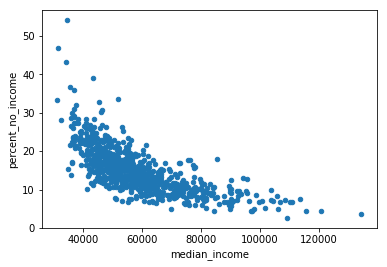

In [7]:
dataFile = pd.read_csv("./new.csv")
plt.scatter(dataFile.median_household_income, dataFile.percent_no_internet, s=20)
plt.xlabel('median_income')
plt.ylabel('percent_no_income')
f5 = plt.gcf()

In [8]:
def percentageEducated():
    list_PercentAboveHS = []
    list_PercentBelowHS = []
    sumTotal = 0
    sumBelowHS = 0
    
    for index,row in dataFile.iterrows():
        
        sumTotal = (row['P_below_middle_school'] + row['P_some_high_school']
                        +row['P_high_school_equivalent']+row['P_some_college']
                            +row['P_bachelor_and_above'])
        sumBelowHS = (row['P_below_middle_school'] + row['P_some_high_school']
                        +row['P_high_school_equivalent'])
        list_PercentBelowHS.append(sumBelowHS/sumTotal)
        list_PercentAboveHS.append(1-(sumBelowHS/sumTotal))
        
        
        
        
    dataFile['Percent_Population_Above_HS_Education'] = list_PercentAboveHS
    dataFile['Percent_Population_Below_HS_Education'] = list_PercentBelowHS        

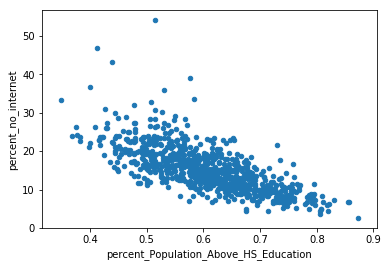

In [9]:
percentageEducated()
plt.scatter(dataFile.Percent_Population_Above_HS_Education, dataFile.percent_no_internet, s=20)
plt.xlabel('percent_Population_Above_HS_Education')
plt.ylabel('percent_no_internet')
f5 = plt.gcf()


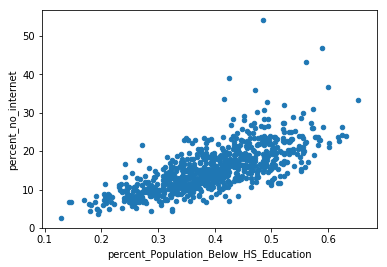

In [10]:
plt.scatter(dataFile.Percent_Population_Below_HS_Education, dataFile.percent_no_internet, s=20)
plt.xlabel('percent_Population_Below_HS_Education')
plt.ylabel('percent_no_internet')
f5 = plt.gcf()

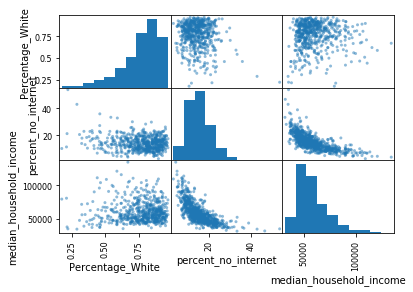

In [12]:
# plot the scatter matrix for P white
fd = pd.plotting.scatter_matrix(df[['Percentage_White', 'percent_no_internet', 'median_household_income']])

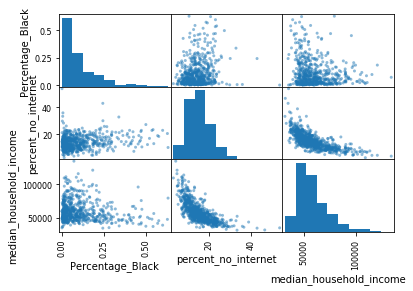

In [14]:
# plot the scatter matrix for P Black
fd = pd.plotting.scatter_matrix(df[['Percentage_Black', 'percent_no_internet', 'median_household_income']])

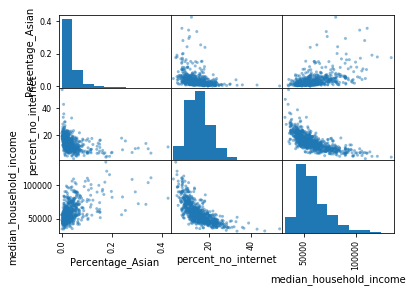

In [15]:
# plot the scatter matrix for P Black
fd = pd.plotting.scatter_matrix(df[['Percentage_Asian', 'percent_no_internet', 'median_household_income']])

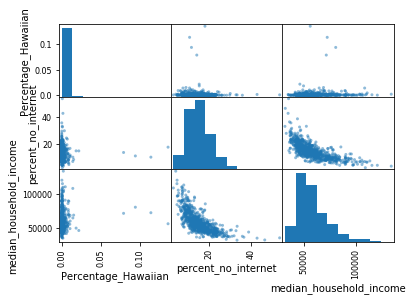

In [16]:
# plot the scatter matrix for P Hawaiian
fd = pd.plotting.scatter_matrix(df[['Percentage_Hawaiian', 'percent_no_internet', 'median_household_income']])

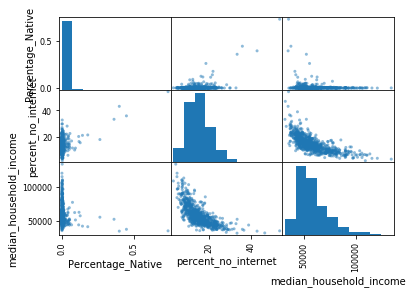

In [17]:
# plot the scatter matrix for P Native
fd = pd.plotting.scatter_matrix(df[['Percentage_Native', 'percent_no_internet', 'median_household_income']])

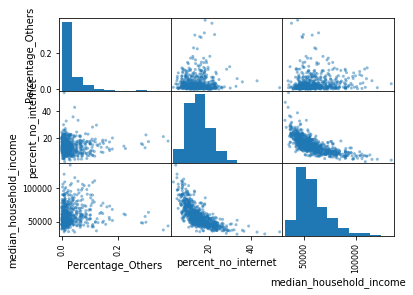

In [18]:
# plot the scatter matrix for P Others
fd = pd.plotting.scatter_matrix(df[['Percentage_Others', 'percent_no_internet', 'median_household_income']])

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [13]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# Ethics & Privacy

The US Census Bureau collects data about the economy and the people living in the United States. Their data is public on their website so we have permission to use it for our project. According to The US Census Bureau website, data are collected from a variety of sources; some are collected from surveys, some are collected as administrative data, which is data collected from the government for recordkeeping. These data are confidential and protected by the federal law. No personal information is included in any of the data from the Census Bureau, including our particular dataset. It only shows summarized that represent groups of people. Furthermore, before releasing any statistics to the public, these data have been reviewed by the Census Bureau to make sure none of the information or characteristics could identify someone. Therefore, it cannot cause harm to any person or business.
 
The dataset, however, is not complete because it has many missing values in the table, which can potentially yield incorrect results. Another concern is that we only have data for large geographic areas over 65000 population. It also only contains data in 2016, so our analysis may not reflect the current trend of Internet usage at the moment.


# Conclusion & Discussion

*Fill in your discussion information here*